In [104]:
import numpy as np
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'svg'
import astropy.constants as astroconst
import os

In [186]:
h = astroconst.h.value
c = astroconst.c.value
Ms = astroconst.M_sun.value
m = 1e3
M = m * Ms
G = astroconst.G.value
L = np.sqrt(12) * np.sqrt(12)*G*M/c
n = 1000000
T = 100
phi = np.pi/2.
r0 = 10
cmd = "src/bhg -r %d -L %d -n %d -T %d -p %d -M %f "%(r0,L,n,T,phi,m)
print(cmd)
os.system(cmd)

src/bhg -r 10 -L 5312172596416684 -n 1000000 -T 100 -p 1 -M 1000.000000 


0

[[  0.00000000e+00   1.47663000e+07   0.00000000e+00   1.00000000e+00
    0.00000000e+00]
 [  1.00000000e-04   1.47663000e+07   5.52659000e+05   1.00244000e+00
    1.12344000e+13]
 [  3.00000000e-04   1.47664000e+07   1.10531000e+06   1.00487000e+00
    2.24689000e+13]
 ..., 
 [  4.99998000e+07   2.92599000e+10   2.92524000e+08   2.93792000e+00
    8.99536000e+18]
 [  4.99999000e+07   2.92599000e+10   2.92524000e+08   2.93792000e+00
    8.99536000e+18]
 [  4.99999000e+07   2.92599000e+10   2.92524000e+08   2.93792000e+00
    8.99537000e+18]]


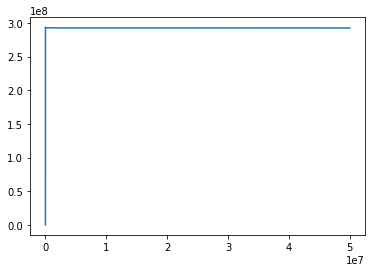

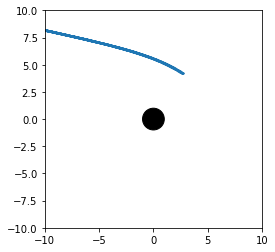

In [187]:
data = np.loadtxt('Geodesic.out')
print(data)
plt.plot(data[:,0],data[:,2])

Rs = 2*G*M/c**2
xcoord = data[:,1] * np.cos(data[:,3]) / Rs
ycoord = data[:,1] * np.sin(data[:,3]) / Rs
circle = plt.Circle((0, 0), 1, color='black')
fig,ax = plt.subplots()
ax.add_artist(circle)
limit = r0
plt.ylim(-limit,limit)
plt.xlim(-limit,limit)
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(xcoord,ycoord, '-o', ms=1)

In [176]:
print(Rs)

295325007610.0249
